In [13]:
import matplotlib.pyplot as plt
import numpy as np
import random
import gym
import time

GAME = 'BipedalWalker-v2'
MAX_STEPS = 1000
env = gym.make(GAME)
in_dimen = env.observation_space.shape[0]
out_dimen = env.action_space.shape[0]
dim=[in_dimen, 12, out_dimen]
N_GENERATION=500
N_pop =100
selection=10
mut_rate=0.01

class NN:
    def __init__(self,dim):
        self.fitness=0.0
        self.dict={}
        for i in range(len(dim)-1):
            self.dict["W"+str(i+1)]=np.random.uniform(low=-1,high=1,size=(dim[i],dim[i+1]))
            self.dict["b"+str(i+1)]=np.random.uniform(low=-1,high=1,size=(dim[i+1]))

def sigmoid(z):
    s = 1./(1+np.exp(-z))
    return s
def propagate(NN,obs):    
    tmp=obs
       
    for i in range(len(dim)-1):
        z = np.dot(NN.dict["W"+str(i+1)].T,tmp)
        tmp = z+NN.dict["b"+str(i+1)]
        #if i != 0 :
            #tmp=np.maximum(0,tmp)
        #tmp = sigmoid(A)
    return  np.tanh(tmp);
def crossover(NN1,NN2):
    NNN=NN(dim)    
    #loop over the weights
    for c in range(len(dim)-1):
        w1=NN1.dict["W"+str(c+1)]
        w2=NN1.dict["W"+str(c+1)]
        w=np.zeros_like(w1)
        for i in range (w1.shape[0]):
            for j in range (w1.shape [1]):
                if random.random() > 0.5 :
                    w[i][j]=w1[i][j]
                else:
                    w[i][j]=w2[i][j]
        NNN.dict["W"+str(c+1)]=w
        b1=NN1.dict["b"+str(c+1)]
        b2=NN2.dict["b"+str(c+1)]
        b = np.zeros_like(b1)
        for i in range(b1.shape[0]):
            if random.random() > 0.5:
                b[i]=b1[i]
            else:
                b[i]=b2[i]
        NNN.dict["b"+str(c+1)]=b
    return NNN

def mutation(NN,rate=0.01):
    
    for c in range(len(dim)-1):
        w=NN.dict["W"+str(c+1)]
        for i in range(w.shape[0]):
            for j in range(w.shape[1]):
                if random.random() < rate:
                    NN.dict["W"+str(c+1)][i][j]=np.random.uniform(low=-1,high=1)
        b=NN.dict["b"+str(c+1)]
        for i in range(b.shape[0]):
            if random.random() < rate :
                NN.dict["b"+str(c+1)][i]=np.random.uniform(low=-1,high=1)
    return NN

def fitness(env,policy,n_episodes=5) :
    total_rewards = 0.0
    for i in range(n_episodes):
        total_rewards += run(env, policy)
    return total_rewards/n_episodes

def run(env, policy, episode_len=100):
    
    total_reward = 0
    obs = env.reset()
    for t in range(MAX_STEPS):
        #env.render()
        action = propagate(policy,obs)
        obs, reward, done, _ = env.step(action)
        total_reward += reward
        if done:
            break
    return total_reward ;

best_NN=None
best_NN_fitness=-100000
visual=[]
population=[NN(dim) for _ in range(N_pop)]
avg=np.zeros(N_GENERATION)
best = np.zeros(N_GENERATION)
    #loop over generations , it could also be a while loop until we obtain for example a score of 0.9
start=time.time()
for i in range(N_GENERATION):
    #vector as the size of N_POPS contains the score of each pop
    rewards=np.zeros(N_pop)
    #calculate the score of each pop
    for j in range(N_pop):
        rewards[j]=fitness(env,population[j])
    print('For Generation',i+1,'maximum :',max(rewards)) 
    #sort of the rewards in order to select the best pops
    best_scores=np.argsort(rewards)
    if i % 50 == 0 :
        visual.append(population[np.argmax(rewards)])
    #selection of best pops
    best[i] = max(rewards)
    
    if best[i]>best_NN_fitness:
        best_NN_fitness=best[i]
        best_NN=population[np.argmax(rewards)]
    avg[i] = np.mean(rewards)
    best_scores=best_scores[-selection:]
    best_pops=[]
    for c in range(selection):
        best_pops.append(population[best_scores[c]])
        #crossover the best ones randomly and ensure the same size of the pop
    new_pops=[]
    for j in range(N_pop):
        new_pops.append(crossover(best_pops[np.random.choice(len(best_scores))],best_pops[np.random.choice(len(best_scores))]))
            
    #Mutation over the newly born pops
    all=[]
    
    for c in range(N_pop):
        all.append (mutation(new_pops[c],mut_rate))
    population=new_pops
end=time.time()

        

[2018-02-01 11:04:32,992] Making new env: BipedalWalker-v2


For Generation 1 maximum : -68.8948611626
For Generation 2 maximum : -44.9726488173
For Generation 3 maximum : -36.7167076887
For Generation 4 maximum : -11.2309471767
For Generation 5 maximum : 5.78831621635
For Generation 6 maximum : 6.96634522411
For Generation 7 maximum : 15.0111343194
For Generation 8 maximum : 8.84518836408
For Generation 9 maximum : 21.7638137151
For Generation 10 maximum : 23.8947308472
For Generation 11 maximum : 45.6903538592
For Generation 12 maximum : 42.4339927002
For Generation 13 maximum : 53.0202371144
For Generation 14 maximum : 49.4006882028
For Generation 15 maximum : 87.2776647993
For Generation 16 maximum : 84.2738421275
For Generation 17 maximum : 84.8855384768
For Generation 18 maximum : 86.9248292546
For Generation 19 maximum : 88.1371056991
For Generation 20 maximum : 89.0800637722
For Generation 21 maximum : 92.7120796755
For Generation 22 maximum : 90.9284338381
For Generation 23 maximum : 90.4653787102
For Generation 24 maximum : 93.76933883

For Generation 195 maximum : 195.987440806
For Generation 196 maximum : 198.462131682
For Generation 197 maximum : 193.578658567
For Generation 198 maximum : 196.557125448
For Generation 199 maximum : 193.550221761
For Generation 200 maximum : 198.008981242
For Generation 201 maximum : 197.543160391
For Generation 202 maximum : 197.184813915
For Generation 203 maximum : 204.140648453
For Generation 204 maximum : 202.398727698
For Generation 205 maximum : 198.256807695
For Generation 206 maximum : 195.392160037
For Generation 207 maximum : 199.514342345
For Generation 208 maximum : 201.682803203
For Generation 209 maximum : 199.880932868
For Generation 210 maximum : 203.09487965
For Generation 211 maximum : 201.420622922
For Generation 212 maximum : 198.674688365
For Generation 213 maximum : 206.193396781
For Generation 214 maximum : 209.127945432
For Generation 215 maximum : 215.273122901
For Generation 216 maximum : 213.275238433
For Generation 217 maximum : 215.363439015
For Generati

For Generation 387 maximum : 249.114381261
For Generation 388 maximum : 247.551235965
For Generation 389 maximum : 243.581716803
For Generation 390 maximum : 249.24378698
For Generation 391 maximum : 250.713171201
For Generation 392 maximum : 253.210150763
For Generation 393 maximum : 259.273260321
For Generation 394 maximum : 255.398344272
For Generation 395 maximum : 258.689964041
For Generation 396 maximum : 255.384852741
For Generation 397 maximum : 256.455933072
For Generation 398 maximum : 259.508778564
For Generation 399 maximum : 258.590240082
For Generation 400 maximum : 258.330128393
For Generation 401 maximum : 256.853285327
For Generation 402 maximum : 257.679651141
For Generation 403 maximum : 259.534733793
For Generation 404 maximum : 261.297793346
For Generation 405 maximum : 251.351883781
For Generation 406 maximum : 257.702502561
For Generation 407 maximum : 248.274516689
For Generation 408 maximum : 255.82948079
For Generation 409 maximum : 250.156270899
For Generatio

In [14]:
print(np.max(best_NN_fitness))

269.327185183


Running time :  15.231804015967581


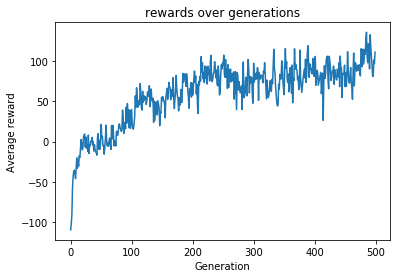

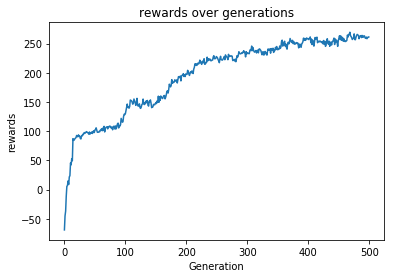

In [22]:
    print('Running time : ',(end-start)/3600)
    plt.plot(avg)
    plt.xlabel('Generation')
    plt.ylabel('Average reward')
    plt.title('rewards over generations')
    plt.show()
    plt.savefig('bipedal_GA_avg.png')
    plt.plot(best)
    plt.xlabel('Generation')
    plt.ylabel('rewards')
    plt.title('rewards over generations')
    plt.show()
    plt.savefig('bipedal_GA_max.png')

In [17]:
## render the best NN
total_reward = 0
for i in range(100):
    
    obs = env.reset()
    for t in range(MAX_STEPS):
        #env.render()
        action = propagate(best_NN ,obs)
        obs, reward, done, _ = env.step(action)
        total_reward += reward
        if done:
            break
print(total_reward/100)

260.403858174


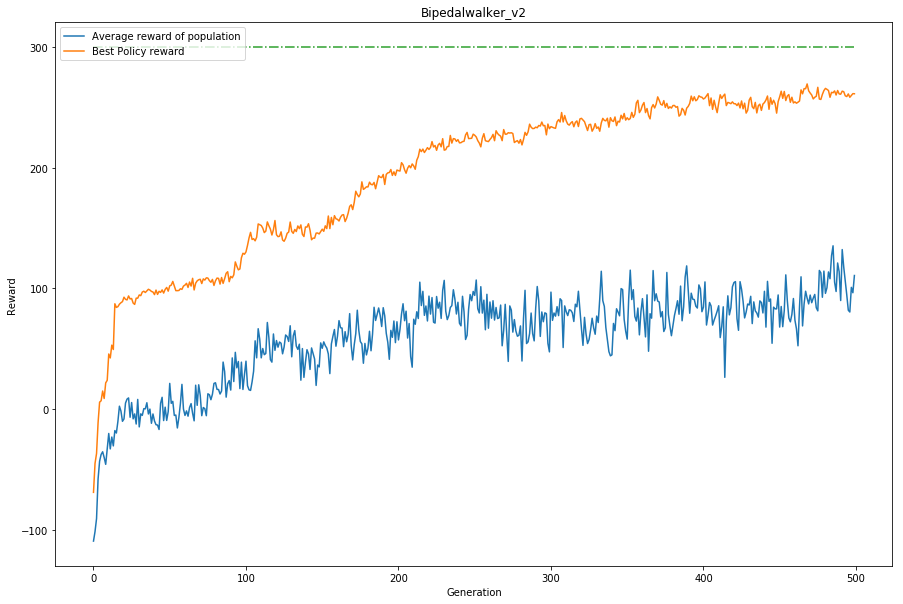

In [46]:
lim=np.zeros(500)+300
fig, ax = plt.subplots()

l1, = ax.plot(avg)
l2, = ax.plot(best)
l3=ax.plot(lim,'-.')

ax.legend((l1, l2), ('Average reward of population', 'Best Policy reward'), loc='upper left', shadow=False)
ax.set_xlabel('Generation')
ax.set_ylabel('Reward')
ax.set_title('Bipedalwalker_v2')
plt.gcf().set_size_inches(15, 10)
plt.savefig('test.png')
plt.show()